# Modeling Rehypothecation Risk in Pooled Security

In [19]:
import matplotlib.pyplot as plt
import numpy as np

## Simple case

Let's start with the simple case with 1 restaker and 1 AVS.

Let:

- $S$ be the total amount restaked
- $R \in{[0,1]}$ be the total risk factor associated with restaking to the AVS (slashing, etc.)
- $S_{effective}$ be the net amount restaked after accounting for risk

Then:
$S_{effective} = S$, because there is no rehypothecation risk in this case.

and there exists:
$S\cdot(1- R)$ security available to rehypothecate.

## Multiple AVS, 1 restaker

Let's now consider the case with $N$ restakers and 2 AVS.

Let:
- $S$ be the amount restaked by restaker.
- $R_1$ be the risk factor associated with restaking to AVS 1.
- $R_2$ be the risk factor associated with restaking to AVS 2.
- $S_{effective,i}$ be the effective amount restaked by restaker $i$ after accounting for risk.

Let's assume that each restaker restakes to both AVSs.

Then:

$S_{effective,1} = S\cdot(1- R_2)$

$S_{effective,2} = S\cdot(1- R_1)$

This is because the risk of restaking to AVS 1 is that AVS 2 will be slashed, and vice versa.

$S_{effective,1} + S_{effective,2} = S\cdot(1- R_2) + S\cdot(1- R_1) = S\cdot(2- R_1 - R_2)$

$S_{effective,1} + S_{effective,2} = S\cdot(2- R_1 - R_2) \leq 2\cdot S$

$0 \leq S_{effective,1} + S_{effective,2} = S\cdot(1 - \frac{R_1}{2}-\frac{R_2}{2}) \leq S$

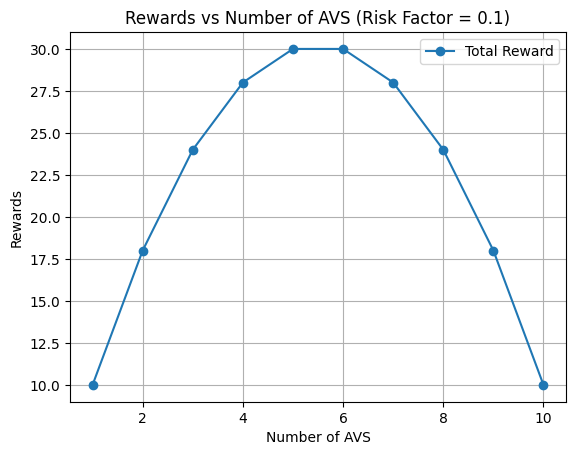

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
total_stake = 100  # Total staking amount
risk_factor = 0.1  # Common risk factor for all AVS
max_avs = 10  # Maximum number of AVS to consider
reward = 0.1  # Reward for each AVS

# Function to calculate effective stake for one AVS
def calculate_effective_stake(total_stake, risk_factor, num_avs):
    return total_stake * (1 - (num_avs-1) * risk_factor)

def calculate_total_effective_stake(total_stake, risk_factor, num_avs):
    return total_stake * (1 - (num_avs-1) * risk_factor / num_avs)

def calculate_total_reward(total_stake, risk_factor, num_avs, reward):
    return calculate_effective_stake(total_stake, risk_factor, num_avs) * reward * num_avs

# Generate data for the graph
avs_range = np.arange(1, max_avs + 1)
effective_stakes_individual = [calculate_effective_stake(total_stake, risk_factor, num_avs) for num_avs in avs_range]
total_effective_stakes = [calculate_total_effective_stake(total_stake, risk_factor, num_avs) for num_avs in avs_range]
total_rewards = [calculate_total_reward(total_stake, risk_factor, num_avs, reward) for num_avs in avs_range]

plt.plot(avs_range, total_rewards, marker='o', label='Total Reward')
plt.xlabel('Number of AVS')
plt.ylabel('Rewards')
plt.title(f'Rewards vs Number of AVS (Risk Factor = {risk_factor})')
plt.legend()
plt.grid(True)
plt.show()

As the number of AVSs increases, the effective amount restaked after the discount decreases and at a certain point, the rewards from restaking will start to decrease.

Operators will need to find the optimal number of AVSs to restake to. 

The decision variable is a binary vector $x$  where $x_i$  is 1 if the restaker participates in AVS $i$ and 0 otherwise.

The optimization problem can be expressed as:

\begin{aligned}
& \underset{x}{\text{maximize}}
& & \sum_{i=1}^{N} \text{reward}_i \times \text{effectiveStake}_i(\mathbf{x}, \mathbf{R})_i \\
& \text{subject to}
& & \sum_{i=1}^{N} R_i \times x_i \leq R_{\text{tolerance}} \\
& & & x_i \in \{0, 1\} \quad \forall i 
\end{aligned}

\begin{aligned}
\text{effectiveStake}_i(\mathbf{x}, \mathbf{R}) = x_i \cdot (1 - R_i)
\end{aligned}


## Mutiple Restakers Generalization

Let's now consider the case with $N$ restakers and 1 AVS.

Let:
- $S_i$ be the amount restaked by restaker $i$.

Then:
$S_{net} = \sum_{i=1}^{N} S_i$, because there is no rehypothecation risk in this case.

and there exists:
$\sum_{i=1}^{N} S_i\cdot(1- R)$ security available to rehypothecate.


## Multiple AVS, Multiple Restakers Generalization

Let's now consider the case with $N$ restakers and $M$ AVS.

Let:

- $S_i$ be the amount restaked by restaker $i$.
- $R_{j}$ be the risk factor associated with restaking to AVS $j$.
- $S_{effective,k}$ be the effective amount restaked AVS $k$ after accounting for risk.

Let's assume that each restaker restakes to all AVSs.

Then:

$S_{effective,k} = \sum_{i=1}^{N} S_i\cdot(1- \sum_{j=1}^M R_{j} + R_{k})$

This is because the risk of restaking to AVS $k$ is that all other AVSs will be slashed.

Interesting to note that the sum of the effective restaked amounts is less than the total amount restaked.

$0 \leq \sum_{i=1}^{N} S_i\cdot(1- \sum_{j=1}^M \frac{R_{j}}{M}) \leq \sum_{i=1}^{N} S_i$

## Takeaways

- The more AVSs, the more rehypothecation risk.
- The sum of the effective restaked amounts is less than the total amount restaked.
- As you restake to more AVSs, there is diminishing returns in terms of security gained for the AVS.
- Operators will need to find the optimal set AVSs to restake to maximize rewards.